# Sparse and Polynomial Regression

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
sns.set_theme(font_scale=2,palette='colorblind')

## Exmaining Residuals

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
X_train,X_test, y_train,y_test = train_test_split(diabetes_X, diabetes_y ,
                         test_size=20,random_state=0)
regr_db = linear_model.LinearRegression()
regr_db.fit(X_train, y_train)
regr_db.score(X_test,y_test)

0.5195333332288746

In [3]:
regr_db.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 10,
 'coef_': array([ -32.30360126, -257.44019182,  513.32582416,  338.46035389,
        -766.84661714,  455.83564292,   92.5514199 ,  184.75080624,
         734.91009007,   82.72479583]),
 'rank_': 10,
 'singular_': array([1.95678408, 1.19959858, 1.08212757, 0.95268243, 0.79449825,
        0.76416914, 0.71267072, 0.64259342, 0.27343748, 0.0914504 ]),
 'intercept_': 152.391853606725}

In [4]:
y_pred = regr_db.predict(X_test)

Text(0, 0.5, 'y_pred')

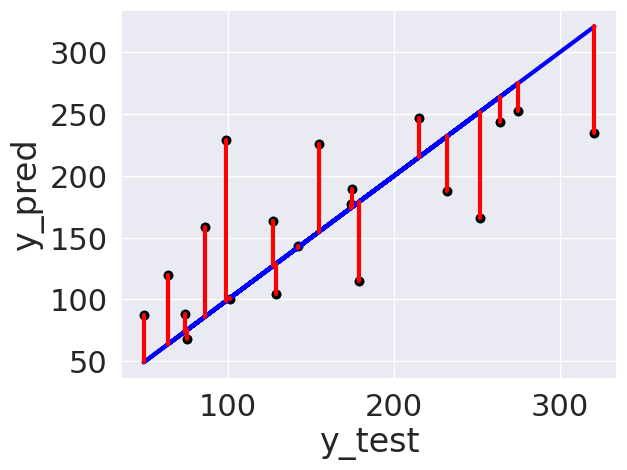

In [5]:
plt.scatter(y_test,y_pred)

plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_test, color='blue', linewidth=3)

# draw vertical lines frome each data point to its predict value
[plt.plot([x,x],[yp,yt], color='red', linewidth=3)
         for x, yp, yt in zip(y_test, y_pred,y_test)];

plt.xlabel('y_test')
plt.ylabel('y_pred')

````{important}
plotting the resiudals this way is okay for seeing how it did, but is not intepretted the same way, I've changed it for the correct interpretation.  This says that there might not be enough information for high values to predict them, *or* maybe a better model could do it. 
````

We can plot the residuals, more directly too:

In [6]:
test_df = pd.DataFrame(X_test,columns = ['x'+str(i) for i in range(len(X_test[0]))])
test_df['err'] = y_pred-y_test
x_df = test_df.melt(var_name = 'feature',id_vars=['err'])
x_df.head()

,err,feature,value
0,-86.089041,x0,0.019913
1,31.811770,x0,-0.012780
2,36.464326,x0,0.038076
3,56.062302,x0,-0.012780
4,14.540509,x0,-0.023677


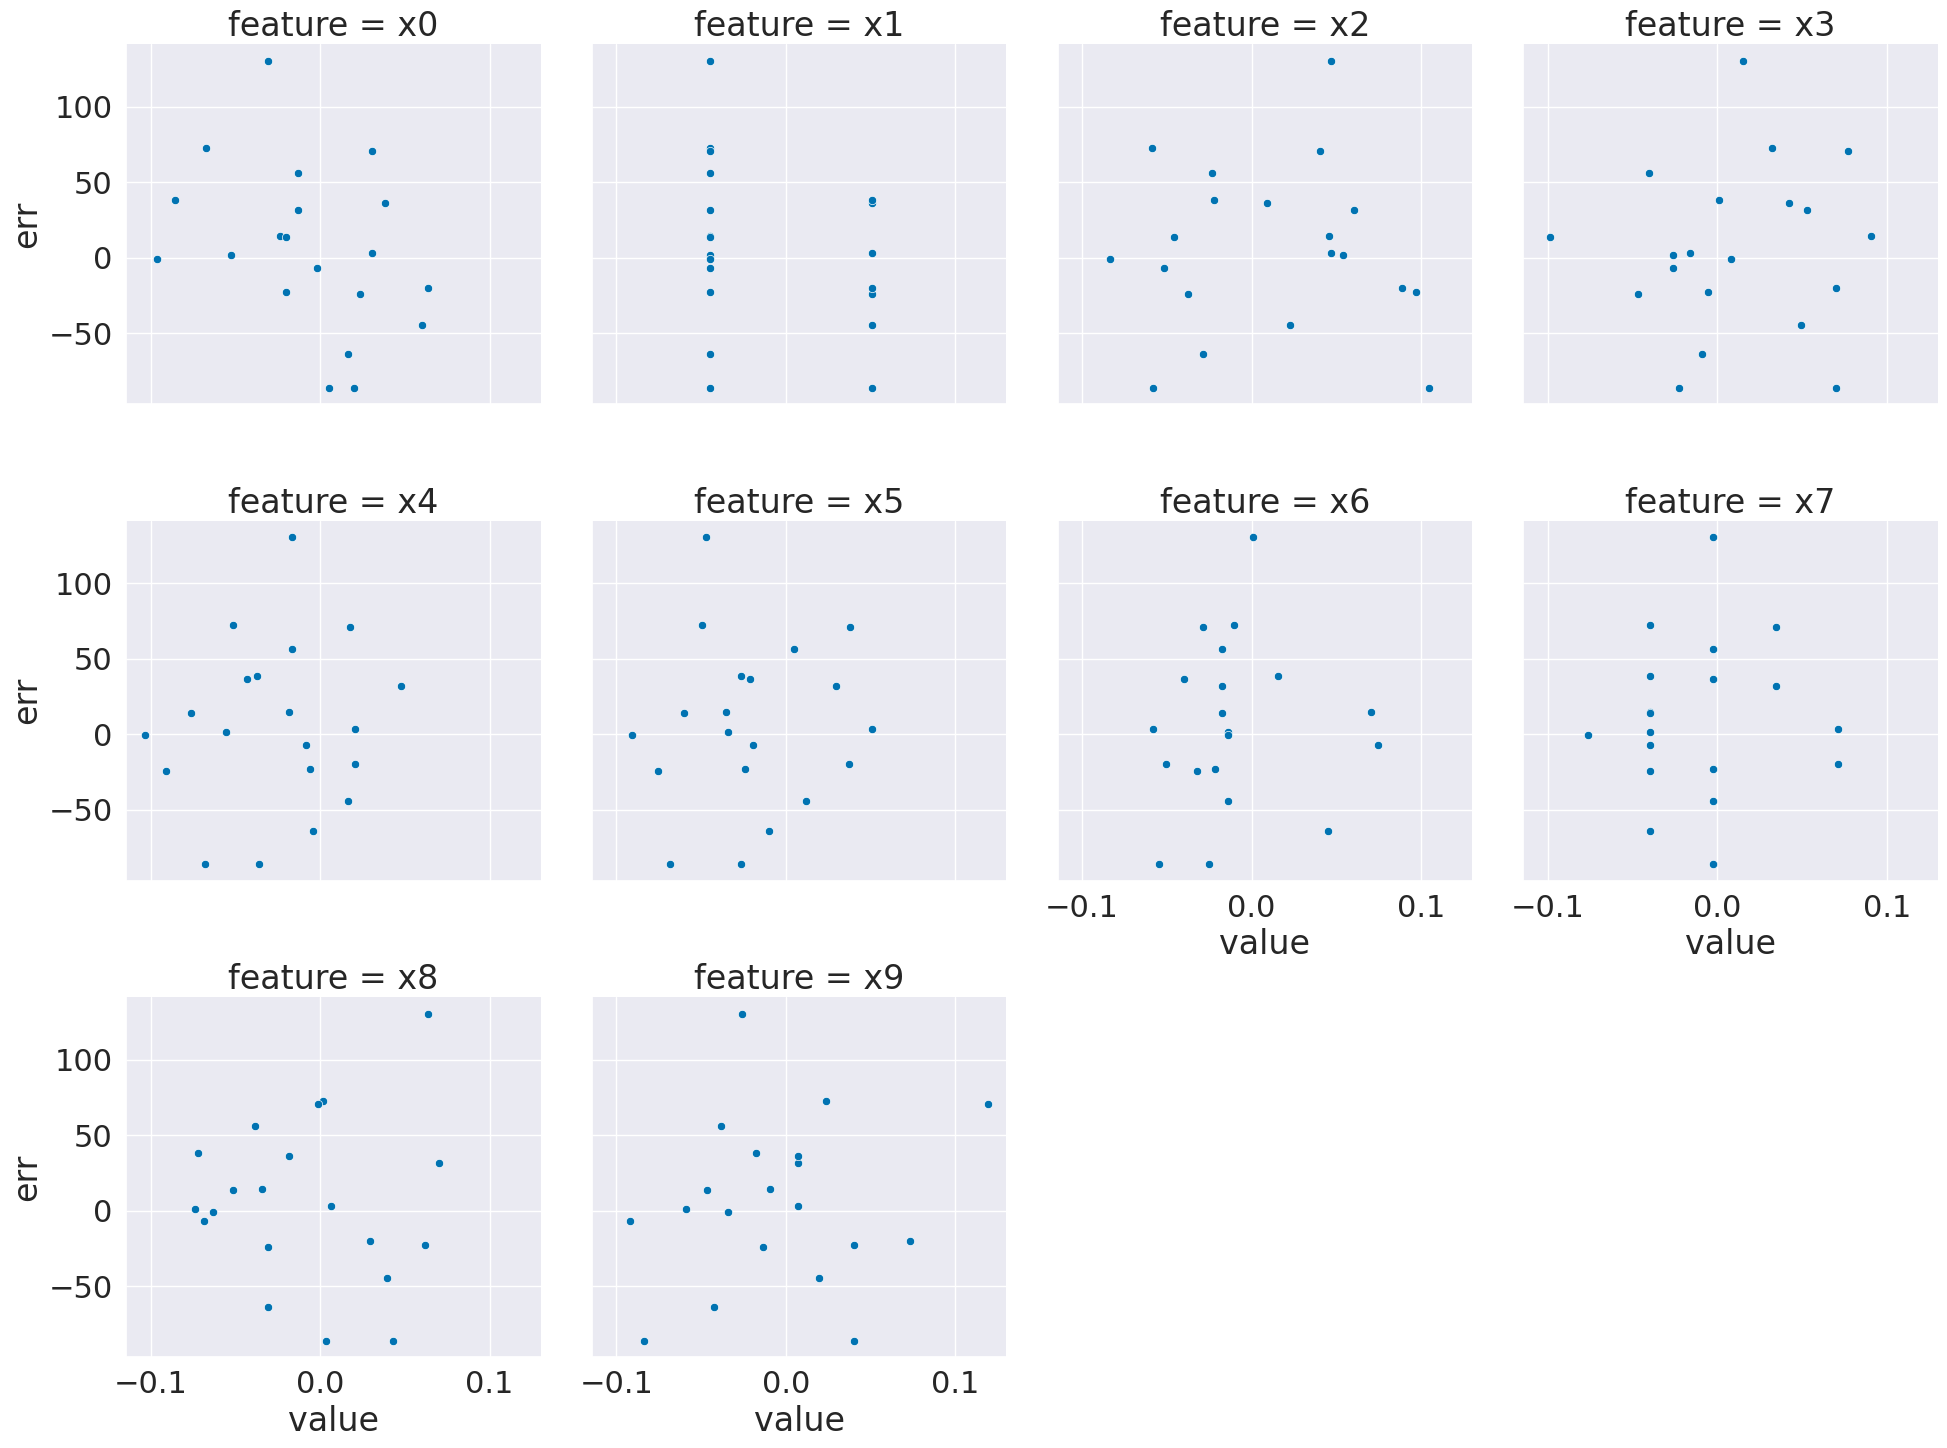

In [7]:
sns.relplot(data= x_df,x='value',col='feature', col_wrap=4,y='err')

Here, we see that the residuals for most features are pretty uniform, but a few (eg the first one) are correlated to the feature value.

## Polynomial regression

Polynomial regression is still a linear problem.  Linear regression solves for
the $\beta_i$ for a $d$ dimensional problem.

$$ y = \beta_0 + \beta_1 x_1 + \ldots + \beta_d x_d = \sum_i^d \beta_i x_i$$

Quadratic regression solves for

$$ y = \beta_0 + \sum_i^d \beta_i x_i$ + \sum_j^d \sum_i^d \beta_{d+i} x_i x_j + \sum_i^d x_i^2$ $$

This is still a linear problem, we can create a new $X$ matrix that has the
polynomial values of each feature  and solve for more $\beta$ values.

We use a transformer object, which works similarly to the estimators, but does
not use targets.
First, we instantiate.

In [8]:
poly = PolynomialFeatures(include_bias=False,)

Then we can transform the data

In [9]:
X2_train = poly.fit_transform(X_train)

In [10]:
X2_train.shape

(422, 65)

In [11]:
X_train.shape

(422, 10)

In [12]:
regr_db2 = linear_model.LinearRegression()
regr_db2.fit(X2_train,y_train)
regr_db2.score(X2_test,y_test)

NameError: name 'X2_test' is not defined

We see the performance is a little better, but let's look at the residuals again.

In [13]:
X2_test = poly.transform(X_test)
y_pred2 = regr_db2.predict(X2_test)

In [14]:
regr_db2.coef_

array([ 2.26718871e+01, -2.84321941e+02,  4.77972133e+02,  3.55751429e+02,
       -1.05551594e+03,  7.64836015e+02,  1.92998441e+02,  1.29510126e+02,
        9.95077095e+02,  6.97824322e+01,  1.35199820e+03,  3.45185945e+03,
        1.47333609e+02, -6.34976797e+01, -3.44685551e+03, -1.39445637e+03,
        5.68431155e+03,  5.24944560e+03,  1.93320706e+03,  1.44078438e+03,
       -1.71687299e+00,  1.07459375e+03,  1.71895547e+03,  1.01185087e+04,
       -8.18260464e+03, -2.98856060e+03, -2.75793035e+03, -2.63196845e+03,
        4.87268727e+02,  3.31912403e+02,  2.57451083e+03, -5.38594465e+03,
        3.88190888e+03,  2.88432660e+03,  4.95180080e+02,  2.98317779e+03,
       -5.23610008e+02, -6.08039517e+01,  8.85704665e+03, -5.89220694e+03,
       -3.89995076e+03, -1.62903703e+03, -2.50355665e+03, -2.07339059e+03,
        9.56513316e+04, -1.35146919e+05, -8.45241707e+04, -4.18163194e+04,
       -8.84048804e+04, -6.63039722e+03,  5.00187584e+04,  5.43127248e+04,
        2.05139512e+04,  

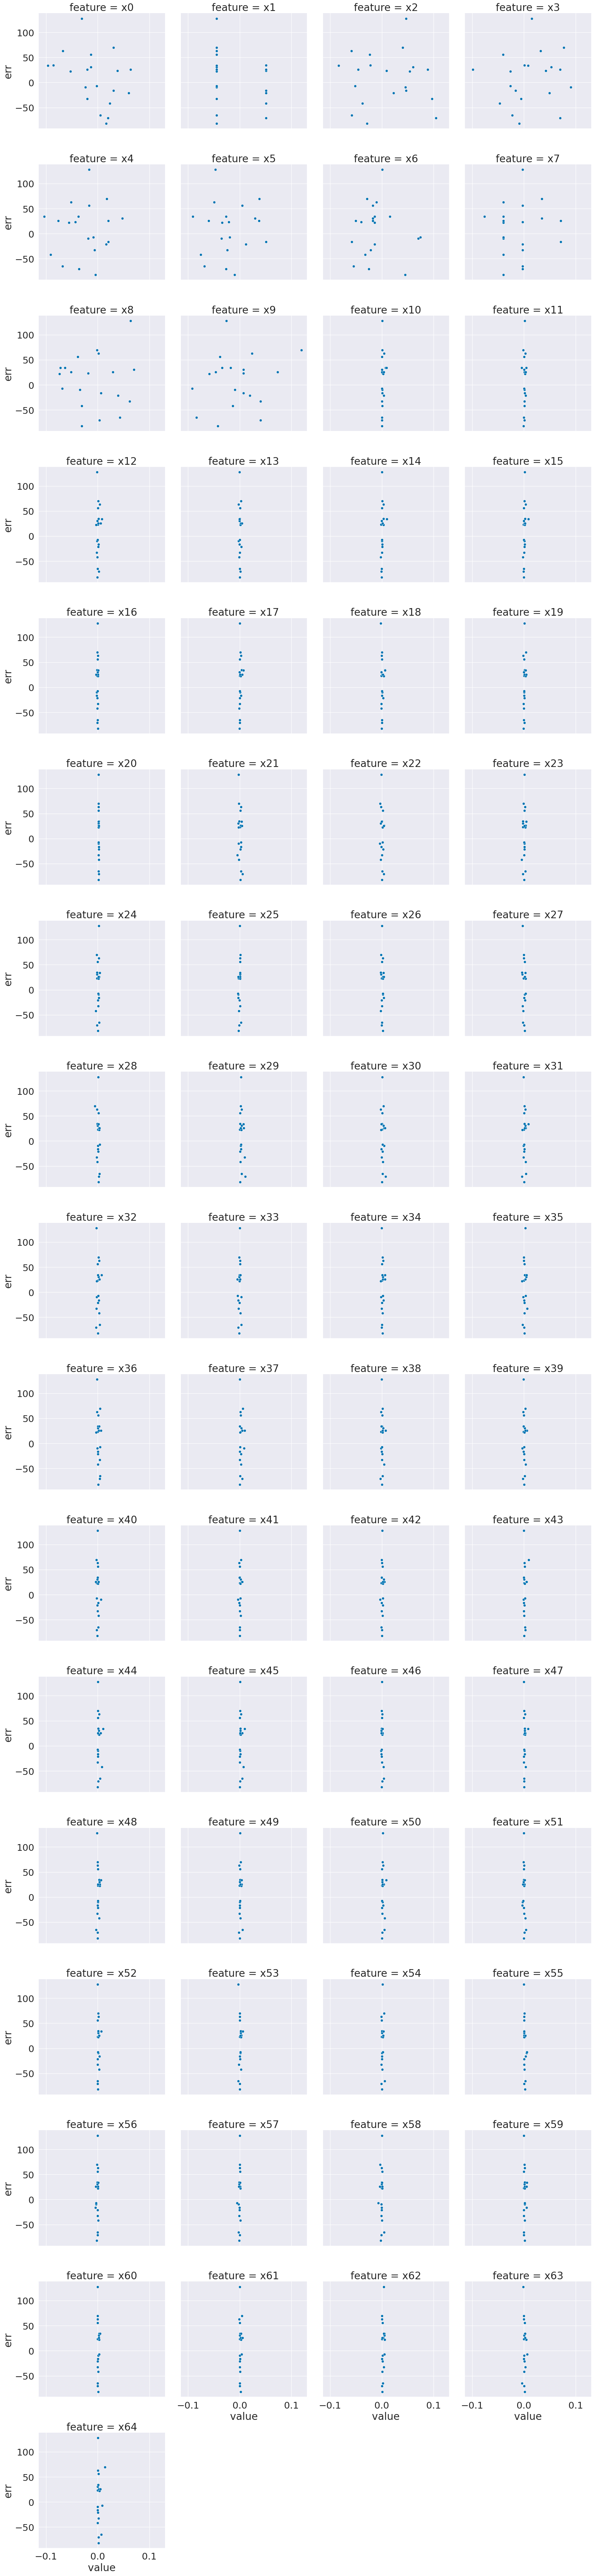

In [15]:
test_df2 = pd.DataFrame(X2_test,columns = ['x'+str(i) for i in range(len(X2_test[0]))])
test_df2['err'] = y_pred2-y_test
x_df2 = test_df2.melt(var_name = 'feature',id_vars=['err'])
sns.relplot(data= x_df2,x='value',col='feature', col_wrap=4,y='err')

From this we can see that most of these features do not vary much at all.

In [16]:
X2_test.shape

(20, 65)

## Sparse Regression

In [17]:
lasso = linear_model.Lasso()

In [18]:
lasso.fit(X_train,y_train)

Lasso()

In [19]:
y_pred_lasso = lasso.predict(X_test)

In [20]:
lasso.coef_

array([  0.        ,  -0.        , 358.27705585,   9.71139556,
         0.        ,   0.        ,  -0.        ,   0.        ,
       309.50698469,   0.        ])

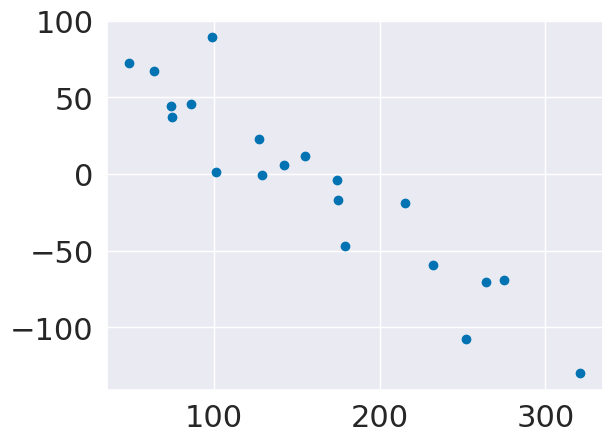

In [21]:
plt.scatter(y_test,y_pred_lasso-y_test)

In [22]:
lasso.score(X_test,y_test)

0.42249260665177746

In [23]:
regr_db.score(X_test,y_test)

0.5195333332288746

In [24]:
lassoa2 = linear_model.Lasso(.3)

In [25]:
lassoa2.fit(X_train,y_train)

Lasso(alpha=0.3)

In [26]:
lassoa2.coef_

array([   0.        ,  -11.95340191,  500.51749129,  196.16550764,
         -0.        ,   -0.        , -118.56561325,    0.        ,
        435.84950435,    0.        ])

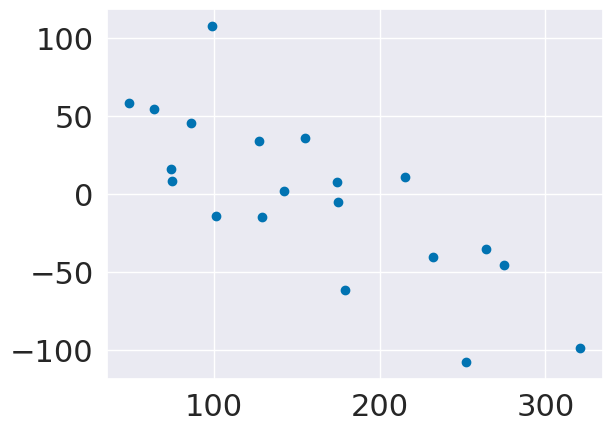

In [27]:
y_pred_lasso2 = lassoa2.predict(X_test)
plt.scatter(y_test,y_pred_lasso2-y_test)

In [28]:
lassoa2.score(X_test,y_test)

0.549634807596075

In [29]:
lassoa2.score(X_train,y_train)

0.47656951646350165

## Combining them

/opt/hostedtoolcache/Python/3.9.15/x64/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.855e+05, tolerance: 2.501e+02
  model = cd_fast.enet_coordinate_descent(
/opt/hostedtoolcache/Python/3.9.15/x64/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.623e+05, tolerance: 2.501e+02
  model = cd_fast.enet_coordinate_descent(


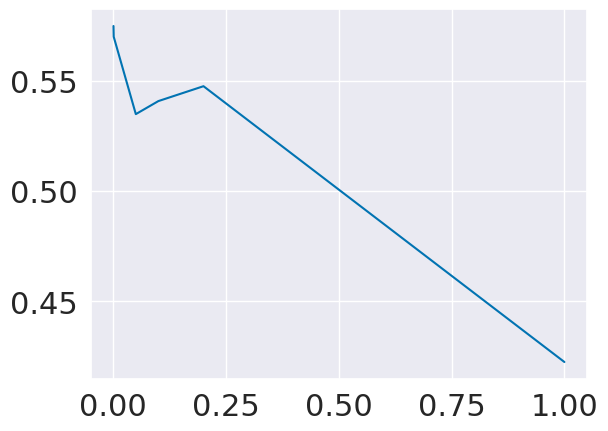

In [30]:
scores = []
alpha_vals = [1,.2,.1,.05,.001,.0005]
for alpha in alpha_vals:
    lasso2 = linear_model.Lasso(alpha)
    lasso2.fit(X2_train,y_train)
    scores.append(lasso2.score(X2_test,y_test))
    
plt.plot(alpha_vals,scores,)

In [31]:
lasso2 = linear_model.Lasso(.001)
lasso2.fit(X2_train,y_train)
lasso2.score(X2_test,y_test)

/opt/hostedtoolcache/Python/3.9.15/x64/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.855e+05, tolerance: 2.501e+02
  model = cd_fast.enet_coordinate_descent(


0.5700228082080702

In [32]:
lasso2.coef_

array([    7.2847557 ,  -265.03975714,   493.61070188,   349.64975297,
       -1615.37347603,  1235.50131986,   395.29739908,   180.43060963,
        1044.09619028,    85.9484476 ,  1459.71954915,  3939.7666462 ,
           0.        ,    62.32177997,    -0.        , -1303.73035699,
        1552.1397576 ,   104.05324926,  1360.85779052,   846.76212154,
          -0.        ,   981.75629416,  1279.46510906,     0.        ,
        -304.4411084 ,  1774.14494353,  -462.17132174,     0.        ,
           0.        ,   257.09550983,  2689.80253642,  -273.88698246,
          -0.        ,    -0.        ,     0.        ,   194.70180318,
          -0.        ,   -19.31963832,   499.65744841,     0.        ,
         409.75290934,    -0.        ,   206.38881023, -1512.15365558,
           0.        ,   964.06977666,     0.        , -3929.82319169,
          -0.        ,     0.        ,     0.        ,  -742.73744294,
           0.        ,  2350.36850741,     0.        ,     0.        ,
      

## Tips example

In [33]:
tips = sns.load_dataset("tips").dropna()
tips_X = tips['total_bill'].values
tips_X = tips_X[:,np.newaxis] # add an axis
tips_y = tips['tip']

tips_X_train,tips_X_test, tips_y_train, tips_y_test = train_test_split(
                     tips_X,
                     tips_y,
                     train_size=.8,
                     random_state=0)

In this example, we have one feature

In [34]:
regr_tips = linear_model.LinearRegression()
regr_tips.fit(tips_X_train,tips_y_train)
regr_tips.score(tips_X_test,tips_y_test)

0.5906895098589039

In [35]:
regr_tips.coef_, regr_tips.intercept_

(array([0.0968534]), 1.0285439454607272)

We can interpret this as that the expected tips is $1.02 + 9.7%.  

````{margin}
These people were not good tippers
````

In [36]:
tip_poly = PolynomialFeatures(include_bias=False,)
tips_X2_train = tip_poly.fit_transform(tips_X_train)
tips_X2_test = tip_poly.transform(tips_X_test)

In [37]:
regr2_tips = linear_model.LinearRegression()
regr2_tips.fit(tips_X2_train,tips_y_train)
regr2_tips.score(tips_X2_test,tips_y_test)

0.5907071399659565

In this case, it doesn't do any better, so the relationship is really linear.

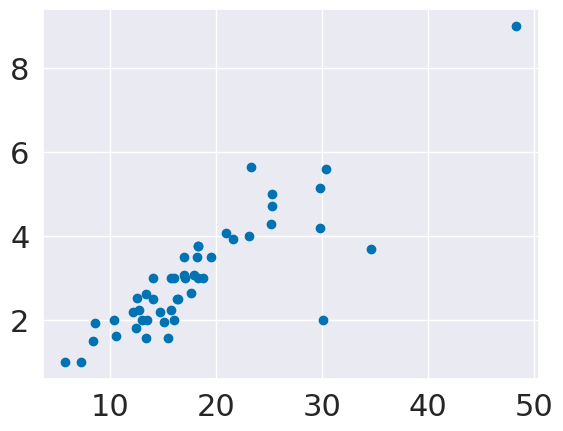

In [38]:
plt.scatter(tips_X_test,tips_y_test)

## Toy example for visualization

we'll sample some random values for x and then add a coefficient to the value and the square

In [39]:
N = 20
slope = 3
sq = 4
sample_x = lambda num_smaples: np.random.normal(5,scale=10,size = num_smaples)
compute_y = lambda cx: slope*cx + sq*cx*cx
x_train = sample_x(N)[:,np.newaxis]
y_train = compute_y(x_train)

x_test = sample_x(N)[:,np.newaxis]
y_test = compute_y(x_test)

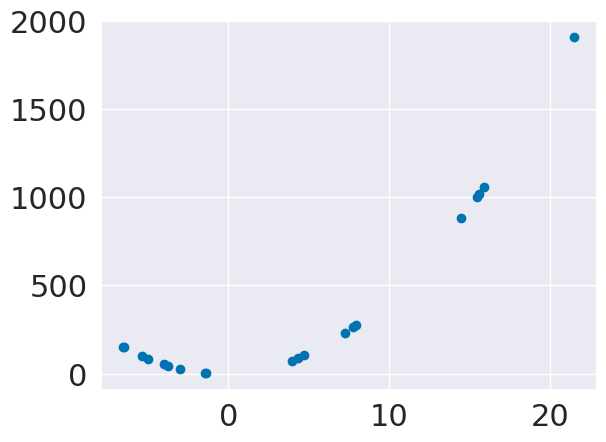

In [40]:
plt.scatter(x_train,y_train)

Now, we'll transform, since this is one value

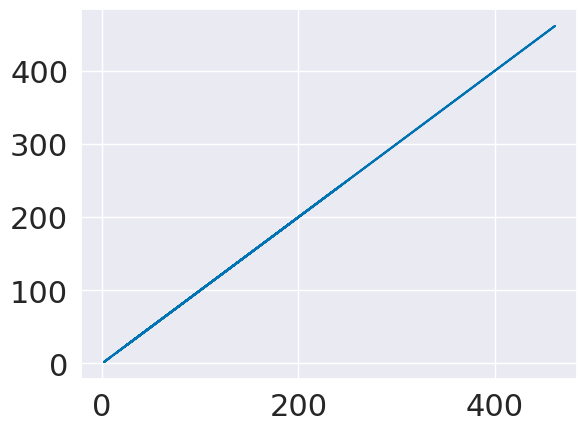

In [41]:
pf = PolynomialFeatures(include_bias=False,)
x2_train = pf.fit_transform(x_train,)
x2_test = pf.transform(x_test,)

plt.plot(x_train*x_train, x2_train[:,1])

In [42]:
regr = linear_model.LinearRegression()
regr.fit(x2_train,y_train)

regr.score(x2_test,y_test)

1.0

In [43]:
regr.coef_

array([[3., 4.]])

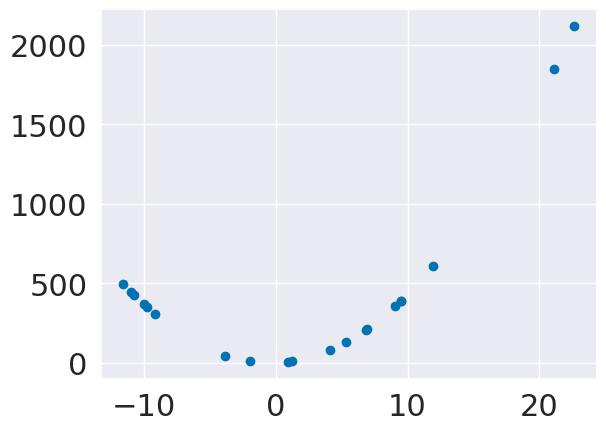

In [44]:
y_pred = regr.predict(x2_test)
plt.scatter(x_test,y_pred)